In [117]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.preprocessing.image import ImageDataGenerator


%matplotlib inline
from skimage.io import imshow, imread
from skimage import img_as_uint, img_as_float

import matplotlib.pyplot as plt
import numpy as np

model = ResNet50(weights='imagenet')

Predicted: [('n03763968', 'military_uniform', 0.99886274), ('n03929855', 'pickelhaube', 0.0006193535), ('n02817516', 'bearskin', 0.00027914564)]


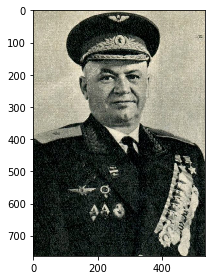

In [59]:
img_path = 'validation/249-KjmPqXTe16k.jpg'
imshow(imread(img_path))

img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

In [60]:
img = image.load_img(img_path, target_size=(224, 224))

In [65]:
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(  
        'validation/',
        classes=['test'],
        target_size = (224, 224),
        batch_size = 1,
        shuffle = False,        
        class_mode = None)  

Found 460 images belonging to 1 classes.


In [66]:
test_generator.reset()
predict = model.predict_generator(test_generator, steps = len(test_generator.filenames))

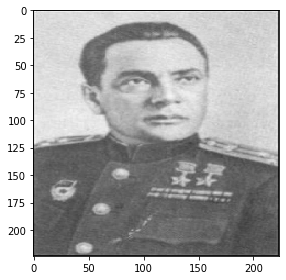

In [149]:
imshow(img_as_float(test_generator[125][0]) / 255)

In [107]:
decode_predictions(predict, top=3)

[[('n02916936', 'bulletproof_vest', 0.83672917),
  ('n03763968', 'military_uniform', 0.15072556),
  ('n04370456', 'sweatshirt', 0.0009714288)],
 [('n03724870', 'mask', 0.45936427),
  ('n04209133', 'shower_cap', 0.12056815),
  ('n04357314', 'sunscreen', 0.072759725)],
 [('n03929855', 'pickelhaube', 0.53329885),
  ('n02669723', 'academic_gown', 0.17153403),
  ('n03787032', 'mortarboard', 0.09120344)],
 [('n03763968', 'military_uniform', 0.802838),
  ('n03929855', 'pickelhaube', 0.10142868),
  ('n02817516', 'bearskin', 0.06361759)],
 [('n03763968', 'military_uniform', 0.9053353),
  ('n02672831', 'accordion', 0.017878022),
  ('n04141076', 'sax', 0.008562015)],
 [('n04356056', 'sunglasses', 0.17170854),
  ('n04355933', 'sunglass', 0.10257646),
  ('n04162706', 'seat_belt', 0.10164754)],
 [('n03481172', 'hammer', 0.4650047),
  ('n03250847', 'drumstick', 0.27540532),
  ('n03498962', 'hatchet', 0.12958358)],
 [('n03929855', 'pickelhaube', 0.47256365),
  ('n03763968', 'military_uniform', 0.17761

In [110]:
dict_classes = dict()
for photo in decode_predictions(predict, top=3):
    for class_p in photo:
        name = class_p[1]
        value = class_p[2]
        if name in dict_classes:
            dict_classes[name] += value
        else:
            dict_classes[name] = 0

In [152]:
sorted(list(dict_classes.items()), key=lambda x: x[1], reverse=True)[:20]

[('military_uniform', 115.73950114577019),
 ('pickelhaube', 43.7439644720871),
 ('web_site', 19.57150156237185),
 ('bow_tie', 16.42308464087546),
 ('academic_gown', 13.70913920737803),
 ('suit', 8.144572987221181),
 ('mortarboard', 7.2760522700846195),
 ('accordion', 6.660129740834236),
 ('sunglass', 5.453864751383662),
 ('Windsor_tie', 4.705276621505618),
 ('sunglasses', 4.308298783376813),
 ('cornet', 3.808227901579812),
 ('bulletproof_vest', 2.851775777002331),
 ('television', 2.4894048739224672),
 ('cuirass', 2.4391749585047364),
 ('bearskin', 2.1406735577766085),
 ('seat_belt', 1.8809131677262485),
 ('shower_cap', 1.8420346230268478),
 ('snorkel', 1.4353861920535564),
 ('breastplate', 1.2058945801109076)]

In [189]:
valid_classes = list(map(lambda x: x[0], sorted(list(dict_classes.items()), key=lambda x: x[1], reverse=True)[:10]))
valid_classes

['military_uniform',
 'pickelhaube',
 'web_site',
 'bow_tie',
 'academic_gown',
 'suit',
 'mortarboard',
 'accordion',
 'sunglass',
 'Windsor_tie']

In [190]:
def filt_pred(class_arr):
    s = 0
    all_s = 0
    for photo in decode_predictions(predict, top=3):
        flag = False
        for class_p in photo:
            name = class_p[1]
            for class_name in class_arr:
                if name == class_name:
                    flag = True
                    break
        if flag:
            s += 1
        all_s += 1
    return s / all_s

In [191]:
filt_pred(valid_classes)

0.8978260869565218